# Regression models in scikit learn
Regression for ML
* descriptive stats - mean, mode, average, stdev, variance etc...
    * measures of central tendency
    * measures of dispersion - stdev
* inferential stats - explain importatnt elements via relationships with other elements
* dimensionality
    * curves to fit 2D data
    * complex curves that fit all data are over-fitted - don't work well for new data predictions
    * regression can be applied to N dimesnions
* good fit - distance from curve to actual points is small
* out of sample
* line equation = y = A + Bx (goal is to find A and B)
    * find the equation
    * evaluate how well it fits
        * r-squared (R<sup>2</sup>)
    * confidence intervals and prediction intervals
    * B = slope; A = intercept
SetUp
* x = independent/explanatory variable
* y = dependent variable
* minimize least square error
    * sum of squares of all Errors is minimized
* residuals - diff between the actual and fitted values
* assumptions:
    1. zero mean
    2. common variance
    3. indpendent of each other
    4. independent of x
    5. normally distributed
* datasets
    * auto-mpg-processed.csv
    * auto-mpg.csv
    * exams.csv
    
MSE loss function
regularized regression
advanced regression
Interpreting results
* Risks

In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel
188,16.0,8,318.0,150,4190,13.0,76,1,dodge coronet brougham
116,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s
198,33.0,4,91.0,53,1795,17.4,76,3,honda civic


In [3]:
automobile_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
automobile_df.shape

(398, 9)

In [5]:
automobile_df = automobile_df.replace('?', np.nan)

In [6]:
automobile_df = automobile_df.dropna()

In [7]:
automobile_df.shape# 6 records dropped

(392, 9)

In [8]:
# remove name and origin - no effect on mpg
automobile_df.drop(['origin','car name'], axis=1, inplace=True)

In [9]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
69,12.0,8,350.0,160,4456,13.5,72
89,15.0,8,318.0,150,3777,12.5,73
68,13.0,8,350.0,155,4502,13.5,72
250,19.4,8,318.0,140,3735,13.2,78
21,24.0,4,107.0,90,2430,14.5,70


In [10]:
#convert model year to age of car
automobile_df['model year']= '19' + automobile_df['model year'].astype(str)

In [11]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
8,14.0,8,455.0,225,4425,10.0,1970
253,20.5,6,200.0,95,3155,18.2,1978
233,29.0,4,97.0,78,1940,14.5,1977
7,14.0,8,440.0,215,4312,8.5,1970
396,28.0,4,120.0,79,2625,18.6,1982


In [12]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [13]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [14]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
131,32.0,4,71.0,65,1836,21.0,46
318,29.8,4,134.0,90,2711,15.5,40
58,25.0,4,97.5,80,2126,17.0,48
70,13.0,8,400.0,190,4422,12.5,48
277,16.2,6,163.0,133,3410,15.8,42


In [15]:
automobile_df.dtypes #confirm all values are numeric

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [16]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [17]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


Text(0, 0.5, 'Miles per Gallon')

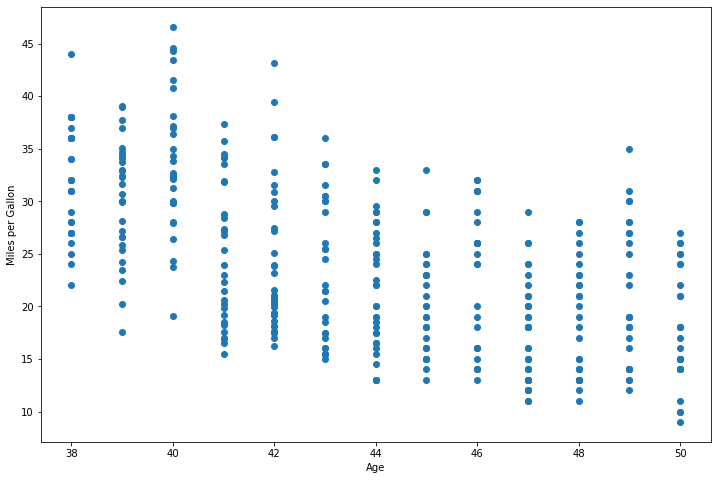

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per Gallon')

<AxesSubplot:xlabel='age', ylabel='mpg'>

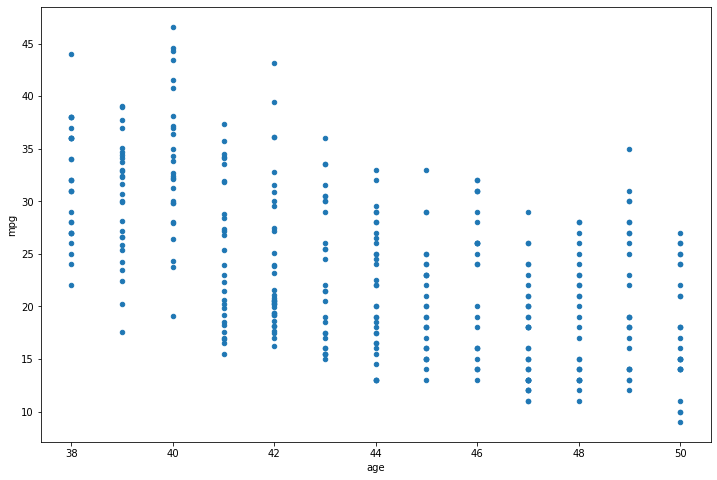

In [19]:
automobile_df.plot.scatter('age', 'mpg', figsize=(12,8))

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

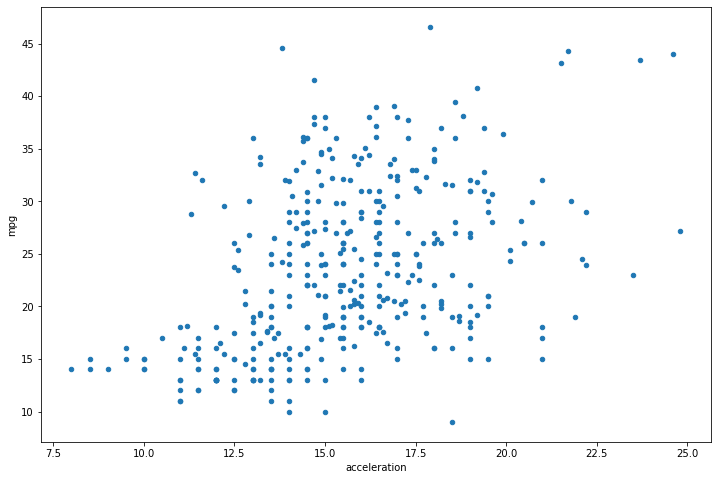

In [20]:
automobile_df.plot.scatter('acceleration', 'mpg', figsize=(12,8))

<AxesSubplot:xlabel='weight', ylabel='mpg'>

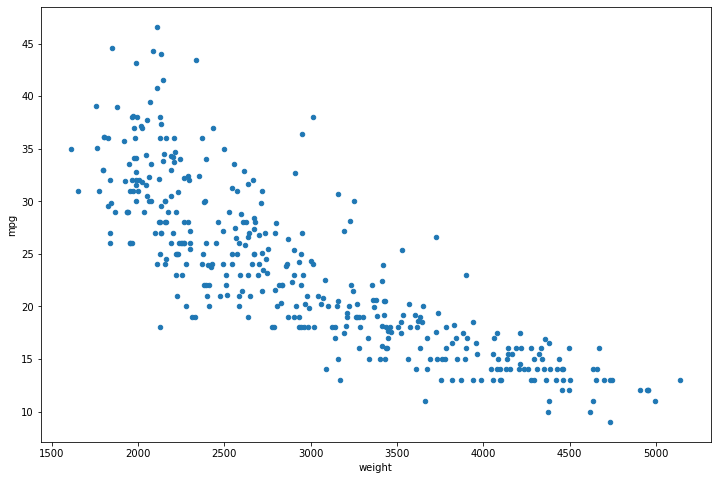

In [21]:
automobile_df.plot.scatter('weight', 'mpg', figsize=(12,8))

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

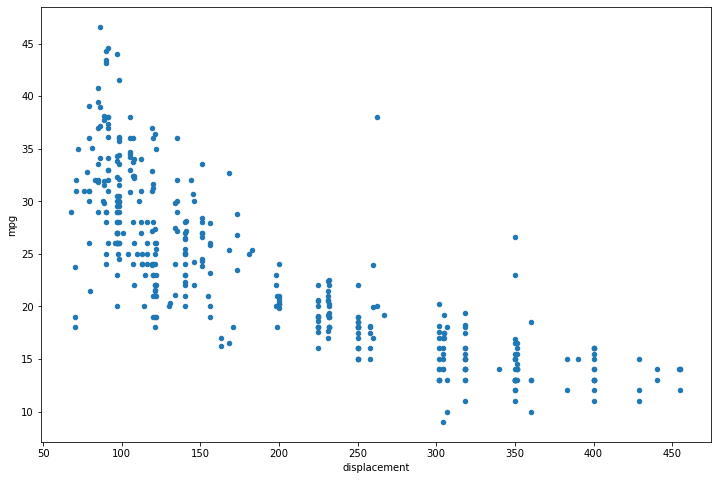

In [22]:
automobile_df.plot.scatter('displacement', 'mpg', figsize=(12,8))

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

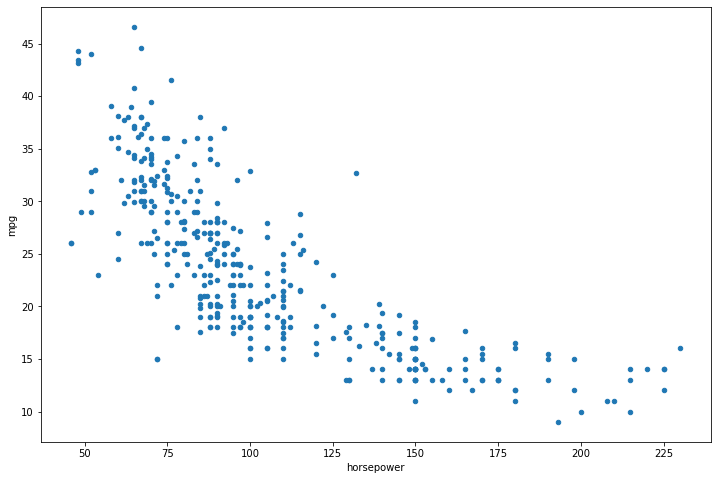

In [23]:
automobile_df.plot.scatter('horsepower', 'mpg', figsize=(12,8))

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

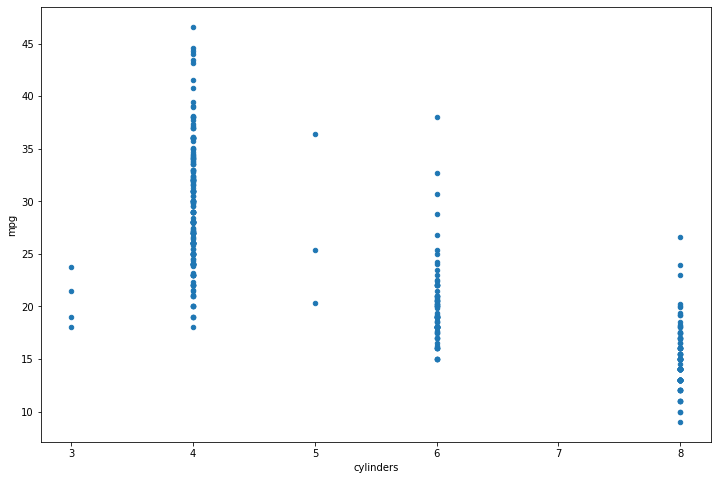

In [24]:
automobile_df.plot.scatter('cylinders', 'mpg', figsize=(12,8))

In [25]:
automobile_corr = automobile_df.corr()
#pairwise correlations for all vars
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

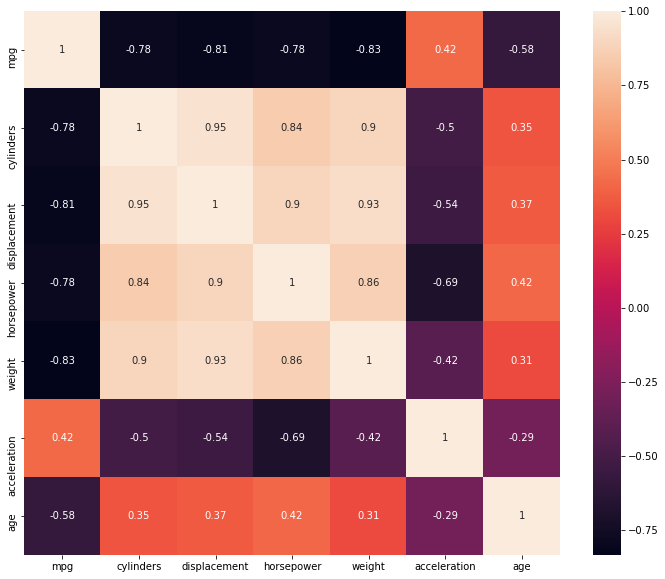

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(automobile_corr, annot=True)

In [27]:
#shuffle data
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,36.0,4,120.0,88,2160,14.5,38
1,30.7,6,145.0,76,3160,19.6,39
2,13.0,8,350.0,155,4502,13.5,48
3,39.0,4,86.0,64,1875,16.4,39
4,14.0,8,350.0,165,4209,12.0,49


In [28]:
automobile_df.to_csv(r'datasets/auto-mpg-processes.csv', index=False)

In [29]:
ls datasets

 Volume in drive D has no label.
 Volume Serial Number is 4844-52A5

 Directory of D:\Users\Rob\Documents\python\scikit-learn_ps\datasets

11/10/2020  07:00 PM    <DIR>          .
11/10/2020  07:00 PM    <DIR>          ..
11/07/2020  02:23 PM            13,441 auto_mpg_processed.csv
11/07/2020  02:22 PM            18,131 auto-mpg.csv
11/07/2020  02:22 PM            11,495 auto-mpg-processed.csv
11/11/2020  01:25 PM            11,888 auto-mpg-processes.csv
11/07/2020  02:23 PM            25,336 cars.csv
11/07/2020  02:23 PM            13,142 cars_processed.csv
11/07/2020  02:23 PM            23,873 diabetes.csv
11/07/2020  02:23 PM            39,972 diabetes_processed.csv
11/07/2020  02:23 PM            31,612 diabetes_processed_incomplete.csv
11/07/2020  02:22 PM            81,381 driver_details.csv
11/07/2020  02:22 PM             7,304 exams.csv
11/07/2020  02:21 PM       133,047,193 fashion-mnist_train.csv
11/07/2020  02:23 PM         1,616,446 GoSales_Tx_LogisticRegression.csv
11/0

## Risks
* 2D data = simple regression
    * mitigate risk by analyzing residuals and r-squared
    *  no cause-effect relationshiop - low r<sup>2</sup> plot of x~y has not pattern
        *  fix by choosing diff x and y
    * mis-specified (poly or exp instead of linear) - high r<sup>2</sup> - residuals are not independent
        * transform x and y (log or returns)
    * incomplete relationship - multipole causes working together - low r<sup>2</sup> residuals are not independent
        * add more x variables
* nD data = multiple regression
    * risks are more complex
    * multicollinearity - x variables that contain the same information - highly correlated with each other
        * kills regression - 
            * coefficients and r-squared are not reliable
            * bad at predictions for new data
        * fixes
            * common sense
            * nuts and bults (may need to subtrace mean and divide by stdev)
                * look at adj r-squared
            * dim reduction - extract signficant feature
                * PCA or factor analysis

## Evaluating models
* r<sup>2</sup> - how well does the model capture the underlying variance
    * range 0-1
    * issue more X vars always increase r-squared, which can lead to over-fitting
* adjusted-r<sup>2</sup>
    * derived from r-squared
    * penalty for additional x vars
    * calculates relevance and increases when those factors are removed
    
## Categorical considerations
* 1 poor regression could maybe decompose into 2 good regression lines (parallel with same slope but diff intercepts)
* combine the 2 regression lines with a dummy var representing the sub-classes
<img src='combinedregeq.png' width=200 />
* 1 dummy var for 2 groups - k-1 dummy vars for k groups or you end up with multi-collinearity
    * sklearn handles under the hood
    * for non-binary categories you just have more dummies



# simple regression

In [30]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
253,25.1,4,140.0,88,2720,15.4,41
180,28.0,4,107.0,86,2464,15.5,43
131,16.0,6,250.0,100,3781,17.0,45
163,20.0,8,262.0,110,3221,13.5,44
227,16.0,8,400.0,180,4220,11.1,42


In [31]:
from sklearn.model_selection import train_test_split

X= automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)#holdout and shuffle

In [32]:
x_train.sample(5)

,horsepower
368,92
335,84
220,110
250,105
104,170


In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
#normalize - scale all features to be between 0-1 - more impactful in complex models

In [34]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6017800285210573


In [35]:
y_pred = linear_model.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
# better score on test data confirms model is not over-fitted
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6126220721807591


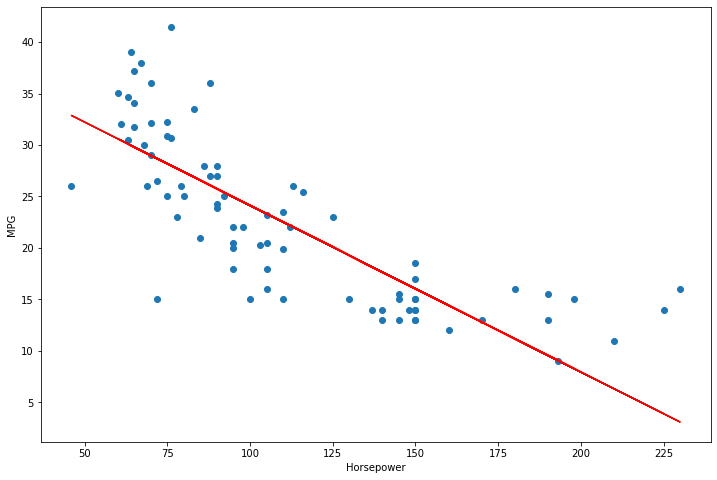

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [38]:
X = automobile_df[['age']]
Y= automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3640502361309764
Testing score:  0.24288115625944107


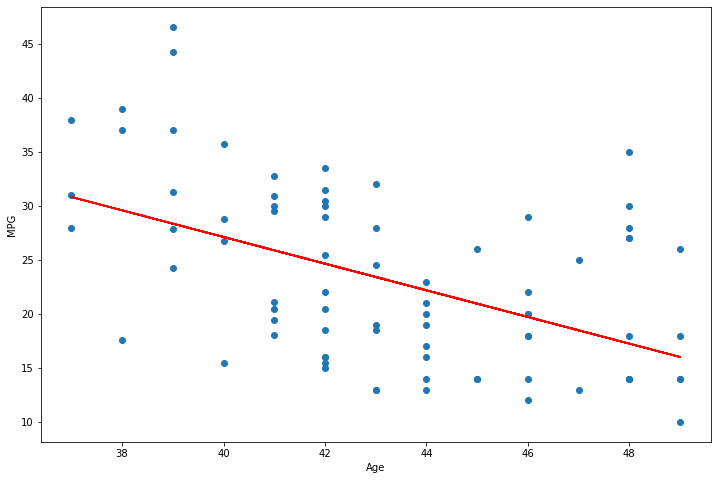

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('MPG')
plt.show()

# multiple regression

In [40]:
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [41]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [42]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6958482944389042


In [43]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.051016
weight         -0.005537
displacement   -0.001815
dtype: float64


In [44]:
y_pred = linear_model.predict(x_test)

In [45]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7494597391412828


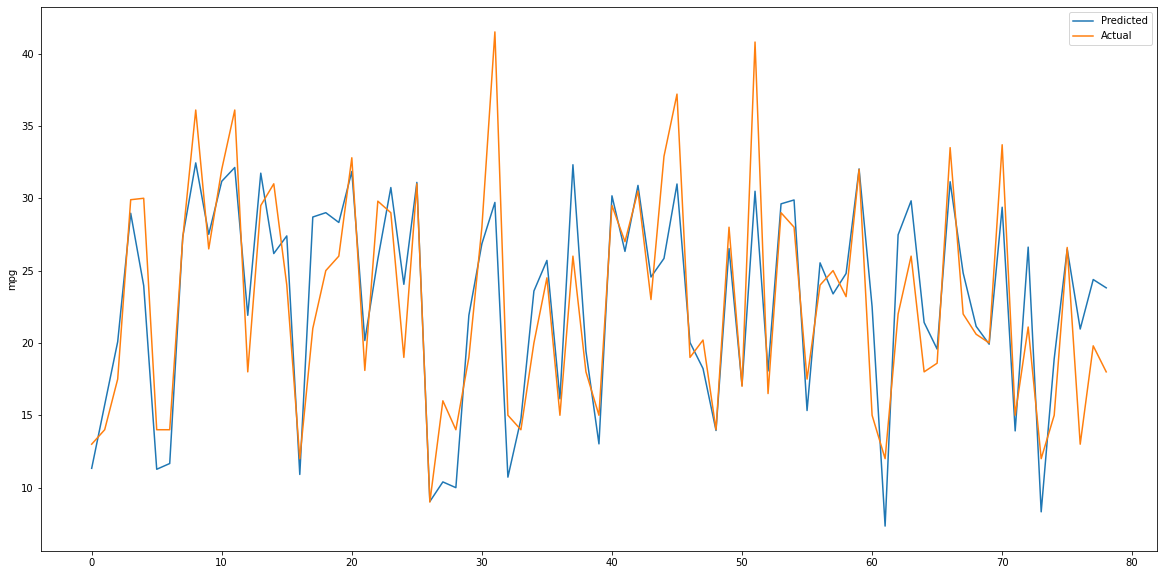

In [47]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('mpg')

plt.legend()
plt.show()

In [55]:
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [56]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [57]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7201317018213825


In [58]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

cylinders      -0.151880
horsepower     -0.040185
acceleration   -0.022769
weight         -0.005727
displacement   -0.003061
dtype: float64


In [59]:
y_pred = linear_model.predict(x_test)

In [60]:
print('Testing score: ', r2_score(y_test, y_pred)) #more features not always better = kitchen sink regression (all features)

Testing score:  0.6398086139642032


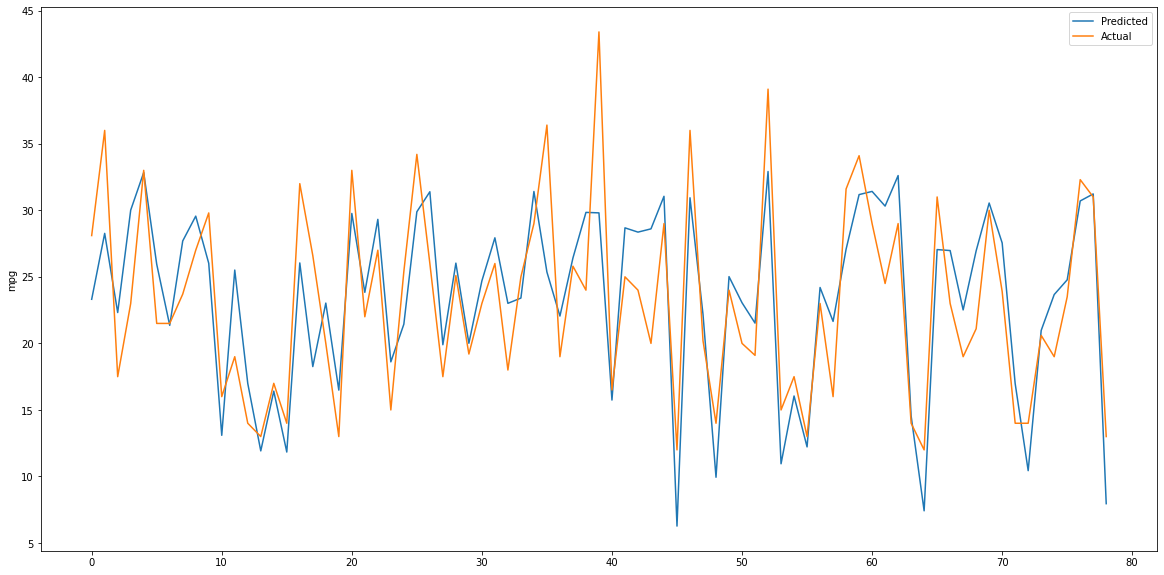

In [61]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('mpg')

plt.legend()
plt.show()

# regression with categorical values

In [63]:
exam_df = pd.read_csv('datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
45,female,group D,some college,standard,none,73,81,78
21,male,group C,some college,free/reduced,completed,67,74,74
81,male,group B,high school,standard,none,70,72,63
50,female,group C,associate's degree,standard,none,72,88,83
48,male,group C,master's degree,standard,completed,95,89,90


In [64]:
# personal data is categorical
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [67]:
from sklearn import preprocessing
#normalize mean 0 and stddev 1 by subtracting mean and dividing by stdev
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [69]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


In [70]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.753353e-16,-3.004541e-16,-4.912737e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


In [71]:
exam_df['parental level of education'].unique() #intrinsic order

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [72]:
#intrinsic order
parent_level_of_education = [ 
    'some high school', 
    'high school', 
    'some college',
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

In [73]:
label_encoding = preprocessing.LabelEncoder()
#label encoder used to encode categorical with intrinsic order
label_encoding = label_encoding.fit(parent_level_of_education)

In [74]:
exam_df['parental level of education'] = label_encoding.transform(exam_df['parental level of education'].astype(str))

In [75]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [76]:
label_encoding.classes_ #show the values

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [77]:
exam_df = pd.get_dummies(exam_df, columns = ['race/ethnicity'])
# use one-hot encoding for categorical with no intrinsic order
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [78]:
exam_df = pd.get_dummies(exam_df, columns = ['gender', 'lunch', 'test preparation course'])
# use one-hot encoding for OTHER categorical with no intrinsic order # can do them all at once
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


In [79]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [80]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [81]:
y_train.shape, y_test.shape

((80,), (20,))

In [82]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept = True).fit(x_train, y_train)
#might encounter dummy trap due to one-hot encoded vars - fit_intercept=True
# linear regression makes sure that dummy vars are not all used regardless of fit-intercept value
# perfect collinearity between dummy vars

In [83]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.8935137079407977


In [84]:
y_pred = linear_model.predict(x_test)

In [85]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.8489586102611801


In [88]:
linear_model = LinearRegression(fit_intercept = False).fit(x_train, y_train)
#same results - proving that this was auto-set to False in first run

In [89]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.8935137079407977


In [90]:
y_pred = linear_model.predict(x_test)

In [91]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.8489586102611789


In [92]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
64,1.709630,1.881947
92,-0.490522,-0.947082
63,-0.244088,-0.818489
51,-0.371094,-0.304121
27,0.667673,0.724617
20,0.824373,0.917505
69,0.104476,0.145952
62,-0.260778,-0.175528
96,-0.652051,-0.497009
89,-1.261538,-0.368417


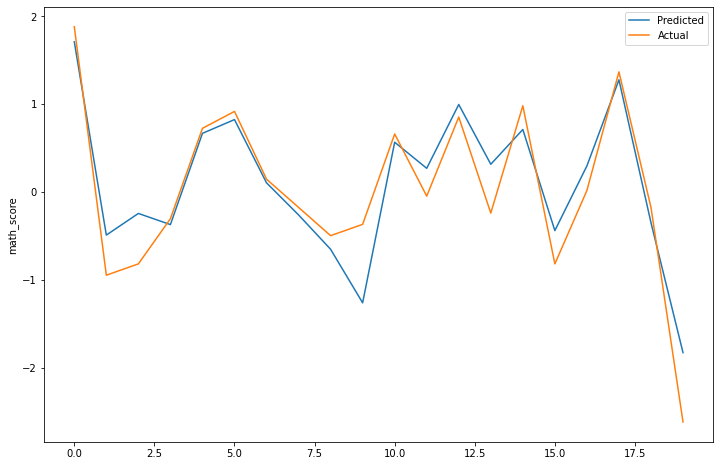

In [93]:
plt.figure(figsize=(12,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [95]:
X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3061507698335826
Testing score:  0.36075612458595807


In [96]:
X = exam_df.drop(['math score', 'writing score'], axis=1) #add reading score again
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8416785764293118
Testing score:  0.7923052609745452


# regularized Regression
to mitigate the impact of over-fitting
<img src='estchoice.png' width=400 />
## regession types
predicting quantity
<img src='regchoice.png' width=400 />
## over-fitting: bias v variance
* good = minimized distance curve to actuals without over-fitting (still good for test)
    * low traing error but high test error
## regularization - penalty function
* penalize complex models - add penalty to objective function that incrdeasses with # of coefficients
    * force optimizer to keep it simple
    * reduces variance error
    * increases bias
* use cross-validation
* dropouts (for NNs) itentionally turn off some neurons in training
## build/train ridge, lasso, elasticNet regression
* loss function for MSE typically = <img src='mse.png' width = 200/>
* elastic combines lasso+ridge
* lasso - least absolute shrinkage and seletion operator - complext math with no closed form solution
    * penalizes large regression coefficients with penalty function - 
    * weight for penalty is alpha &alpha;
        * zero weight devolves to regular mse
        * inf wight forces small coeffs to zero
        * model seletion by tuning alpha &alpha;
    * L-1 norm = absolute value of all coefficients raised to power 1
<img src='lasso_mse.png' width = 400 />
* ridge - penalizes large regression coefficients - has a closed form solution
    * L-2 norm = absolute value of all coefficients raised to power 2 == Ridge
    * high alpha &alpha; does not force coeffs to zero
        * no model selection by turning off features
    * weight using alpha &alpha; again
    * used when there are a large # of significant features




# helper functions

In [99]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [103]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings #not recommended
warnings.filterwarnings("ignore")

In [104]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [105]:
result_dict = {} #to hold training and test sdcores from various models

In [180]:
def build_model(regression_fn, name_of_y_col, name_of_x_cols, dataset, test_frac=.2, preprocessor_fn=None,
               show_plot_Y=False, show_plot_scatter=False):
    """
    show_plot_Y: controls plot of actuals vs predicted
    show_plot_scatter: shows how the predicted fits over data
    
    """

    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocessor_fn is not None:
        X = preprocessor_fn(X)
        
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    res = {'training_score':model.score(x_train, y_train),'test_score':r2_score(y_test, y_pred)}
    print('Training score: ', model.score(x_train, y_train))
    print("Test score: ", r2_score(y_test, y_pred))
    
    if show_plot_Y:
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
        
    if show_plot_scatter: # only works for single feature training
        fig, ax = plt.subplots(figsize=(12,8))
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        plt.legend(['Predicted line', 'Observed data'])
        plt.show()
        
    return res

In [126]:
def compare_results():
    for key in result_dict:
        print('Regreession: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('test score', result_dict[key]['test_score'])
        print()
        

In [127]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    return model

Training score:  0.7043510734173829
Test score:  0.6344827173995815


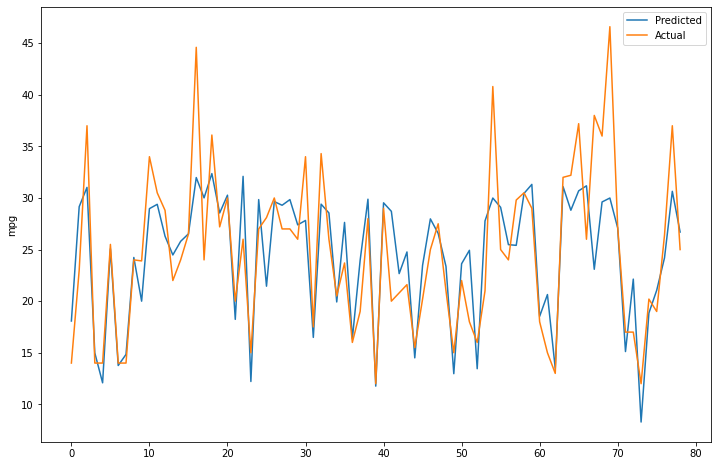

In [128]:
result_dict['mpg ~ single linear'] = build_model(linear_reg, 'mpg', ['weight'], automobile_df, show_plot_Y=True)

In [129]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815



Training score:  0.7040647820746387
Test score:  0.716616597647838


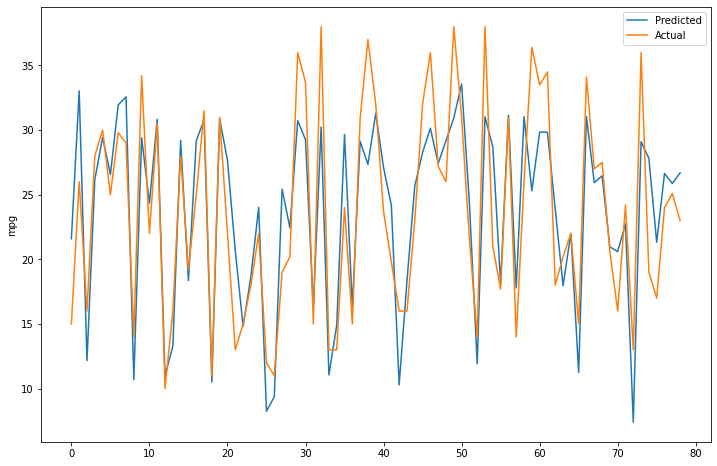

In [130]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

Training score:  0.703458449176237
Test score:  0.7107800139268792


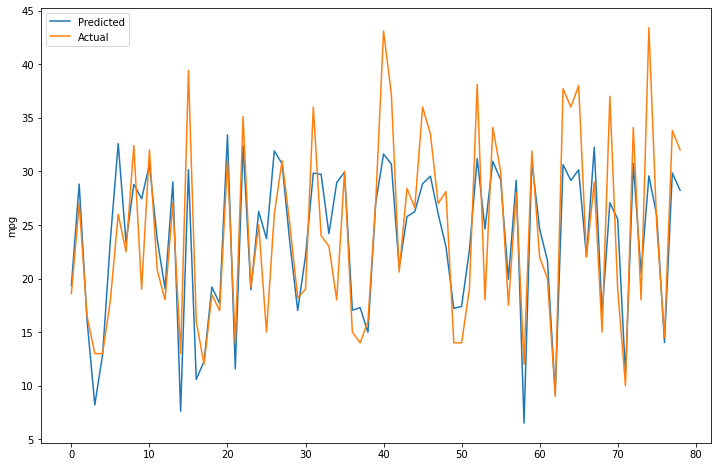

In [131]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg, 'mpg', 
                                                       ['horsepower', 'weight'],
                                                       automobile_df, show_plot_Y=True)

In [133]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792



### lasso

In [136]:
def lasso_reg(x_train, y_train, alpha=.5):#L1 regularization
    model=Lasso(alpha=alpha)#default &alpha; is 1; 0 will cause it to produce normal linear regression
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7017344040446548
Test score:  0.7230071615786104


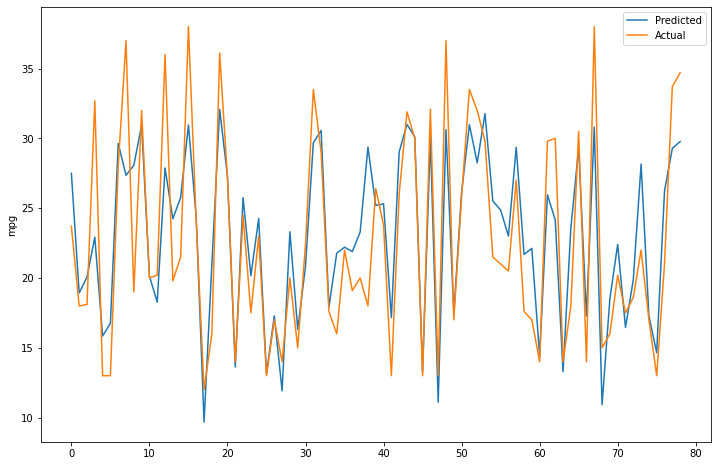

In [139]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

In [140]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792

Regreession:  mpg ~ kitchen_sink_lasso
Training score 0.7017344040446548
test score 0.7230071615786104



### ridge

In [141]:
def ridge_reg(x_train, y_train, alpha=.5, normalize = True):
    model=Ridge(alpha=alpha, normalize = normalize)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.6702731272170472
Test score:  0.7630699328102779


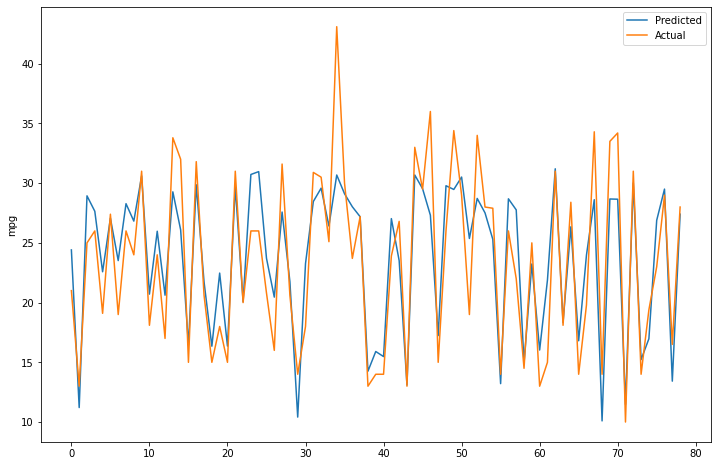

In [142]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

In [143]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792

Regreession:  mpg ~ kitchen_sink_lasso
Training score 0.7017344040446548
test score 0.7230071615786104

Regreession:  mpg ~ kitchen_sink_ridge
Training score 0.6702731272170472
test score 0.7630699328102779



### ElasticNet
(lasso + ridge) = L1 + L2 regularization

In [144]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=.5, normalize=False, max_iter=100000,
                    warm_start=True, equivalent_to="Elastic Net"):
    """
    nromalize = normally should but works fine on small datasets with false
    warm_start = use prior run as the initialization for current run
    """
    print("Equivalent to: ", equivalent_to)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

In [145]:
from functools import partial

Equivalent to:  OLS
Training score:  0.7141148544437307
Test score:  0.6778887311248807


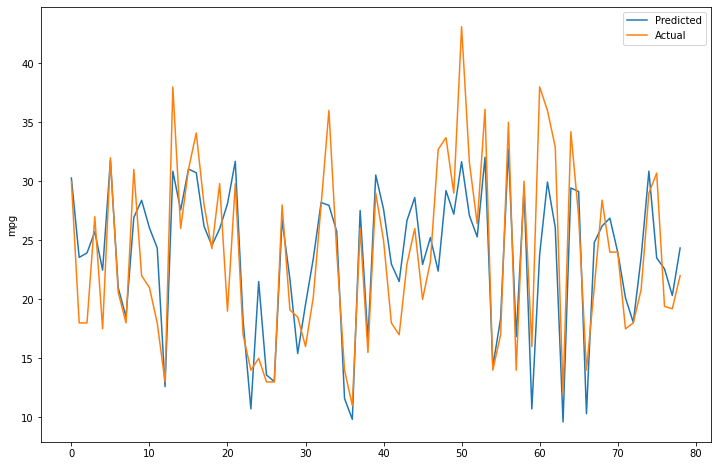

In [154]:
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to="OLS"),
                                                                'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)
#typically this triggers a convergence warning b/c alpha is = 0 is the same as OLS

Equivalent to:  Lasso
Training score:  0.7071966170222167
Test score:  0.6983025525775793


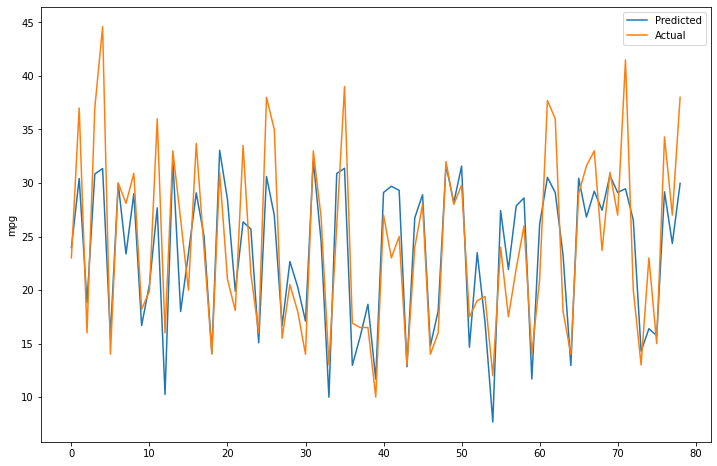

In [153]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=1,
                                                                        equivalent_to="Lasso"),
                                                                'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)


Equivalent to:  Ridge
Training score:  0.7085797111750345
Test score:  0.6922808785681669


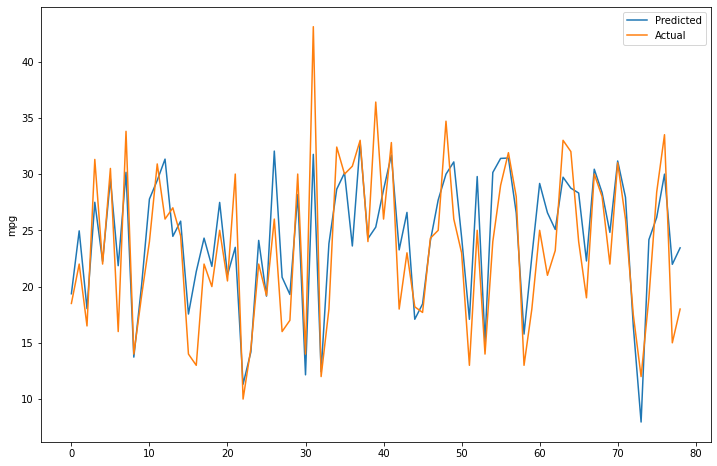

In [152]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0,
                                                                        equivalent_to="Ridge"),
                                                                'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

Equivalent to:  Elastic Net
Training score:  0.6996856122929971
Test score:  0.7169592184064373


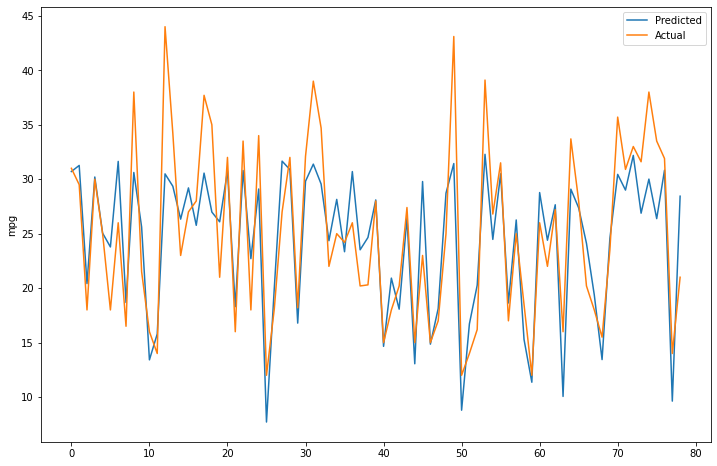

In [151]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=.5),
                                                                'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

In [155]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792

Regreession:  mpg ~ kitchen_sink_lasso
Training score 0.7017344040446548
test score 0.7230071615786104

Regreession:  mpg ~ kitchen_sink_ridge
Training score 0.6702731272170472
test score 0.7630699328102779

Regreession:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7141148544437307
test score 0.6778887311248807

Regreession:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996856122929971
test score 0.7169592184064373

Regreession:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7085797111750345
test score 0.6922808785681669

Regreession:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7071966170222167
test score 0.6983025525775793



# choosing the right regression technique
* choose based on dataset size and # of features
<img src='regchoice_table.png' width = 500 />
### SVM  regression
* typically used for classification - 1 hard decision boundary - 
    * widest boundary between support vectors - no points in margin - 
    * outliers on *wrong side* penalized
    * width minimized by optimizer
* objective function is different - 
    * find the lines that maximize points inside margin - few points outside margin
    * penalize ***all*** outliers that are far away from the margin
    * with = &epsilon; hyperparameter -> part of model design
* LinearSVR == SVR(kernel='linear')
    * SVR is more flexible penalties/loss functions and scales better for large datasets


In [157]:
def svr_reg(x_train, y_train, kernel='linear', epsilon = .05, C=.3):
    """
    C = penalty applied if outside margin
    epsilon = margin size
    """
    model = SVR(kernel=kernel, epsilon = epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.6978640474966746
Test score:  0.7194248658436062


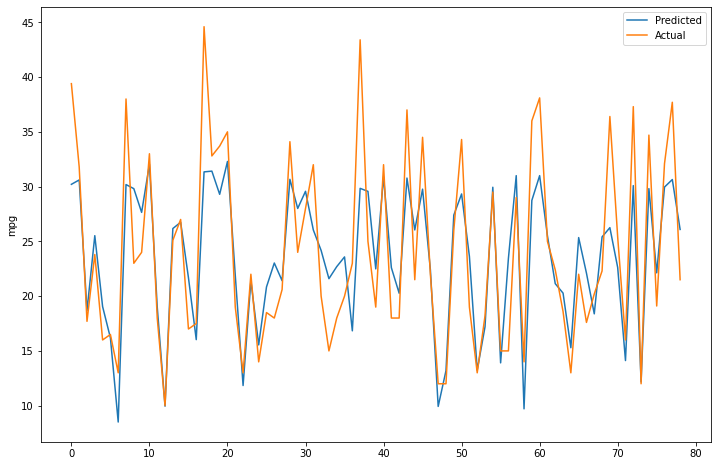

Wall time: 6.85 s


In [162]:
%%time
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

In [163]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792

Regreession:  mpg ~ kitchen_sink_lasso
Training score 0.7017344040446548
test score 0.7230071615786104

Regreession:  mpg ~ kitchen_sink_ridge
Training score 0.6702731272170472
test score 0.7630699328102779

Regreession:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7141148544437307
test score 0.6778887311248807

Regreession:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996856122929971
test score 0.7169592184064373

Regreession:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7085797111750345
test score 0.6922808785681669

Regreession:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7071966170222167
test score 0.6983025525775793

Regreession:  mpg ~ kitchen_si

### Nearest Neighbor regression
* find what is most similar to current sample
* distance measures: Hamming, Manhattan, Euclidian (most common)
* KNN regression - find K closest points and use their average value as predicted
* radius neighbors regression - find average of y-values within radius
    * circle around new data point = use average of y-values


In [164]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    """
    n_neighbors should be determined with hyper parameter tuning
    """
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7618542454447284
Test score:  0.6913842422181904


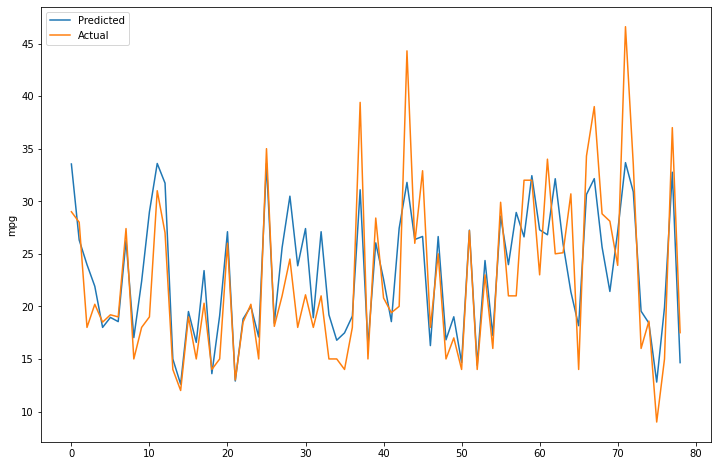

Wall time: 210 ms


In [165]:
%%time
result_dict['mpg ~ kitchen_sink_KNN'] = build_model(kneighbors_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

In [166]:
compare_results()

Regreession:  mpg ~ single linear
Training score 0.7043510734173829
test score 0.6344827173995815

Regreession:  mpg ~ kitchen_sink_linear
Training score 0.7040647820746387
test score 0.716616597647838

Regreession:  mpg ~ parsimonius_linear
Training score 0.703458449176237
test score 0.7107800139268792

Regreession:  mpg ~ kitchen_sink_lasso
Training score 0.7017344040446548
test score 0.7230071615786104

Regreession:  mpg ~ kitchen_sink_ridge
Training score 0.6702731272170472
test score 0.7630699328102779

Regreession:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7141148544437307
test score 0.6778887311248807

Regreession:  mpg ~ kitchen_sink_elastic_net
Training score 0.6996856122929971
test score 0.7169592184064373

Regreession:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7085797111750345
test score 0.6922808785681669

Regreession:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7071966170222167
test score 0.6983025525775793

Regreession:  mpg ~ kitchen_si

### stochastic gradient descent (SGD)
* iterative - minimum mean-squared error (or in batches)
* regession coefficients W and b to minimize MSE - walk down the slope
* diff loss functions
    * MSE loss yields OLS
    * other loss options can result in requivalent to Lasso, Ridge, and Elastic Net
* good with large datasets


In [168]:
#standardize and scale first # mean =0, and variance=1
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [170]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3): #iterations = epochs
    """ tol = tolerance for stopping parameter - loss between iterations <tol 
    
    """
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7094831957233202
Test score:  0.6735654766206719


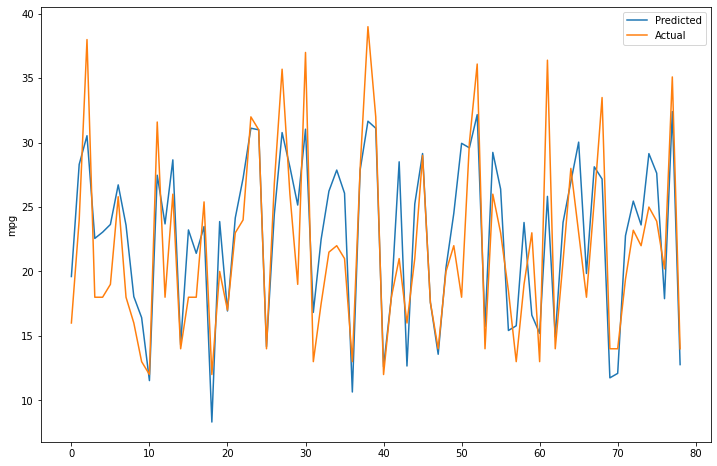

Wall time: 196 ms


In [181]:
%%time
result_dict['mpg ~ kitchen_sink_SGD'] = build_model(sgd_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True,
                                                   preprocessor_fn=apply_standard_scaler)


### Decision tree regression
* rules using thresholds to split decisions - CART - classification and regression tree
* traverse nodes to leaf node - return the average y for all training data in that node


In [185]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model=DecisionTreeRegressor(max_depth = max_depth)
    model.fit(x_train, y_train)
    return model

Training score:  0.7393741527790054
Test score:  0.6233956920093733


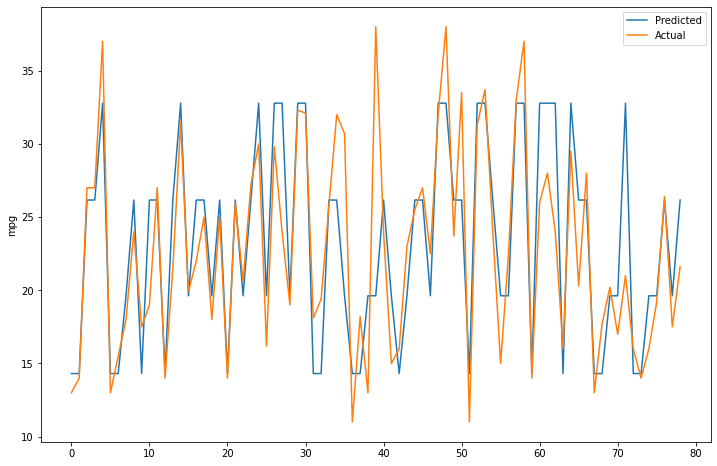

Wall time: 197 ms


In [186]:
%%time
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

### Least-angle regression (LARS)
* small dataset with many features (more features than samples)
* select x values with the highest correlation with unexplained y 
* 0 angle between vectors = highly correlated
* -1 correlation - perfectly opposed
* orthogonal - angle = 90 = uncorrelated
* process
    * start with all coefficients &Beta; equal to 0
    * find predictor most correlated with y (add to model)
    * increase &Beta; for that coefficient until some other coefficient is more highly correlated
    * add the next predictor to the model - increase &Beta; for both of these until another is found
    * loop until X vars are in the model
* Intuitive and stable
* equivalent to forward stepwise regression - adding vars 1-by-1
    * more efficient
    * complexity =~  OLS
* issues dealing with highly correlated x vars (multicolinearity)
    * explore data and remove them prior to running the regression
    

In [188]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model=Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7141405088923065
Test score:  0.6619606417560575


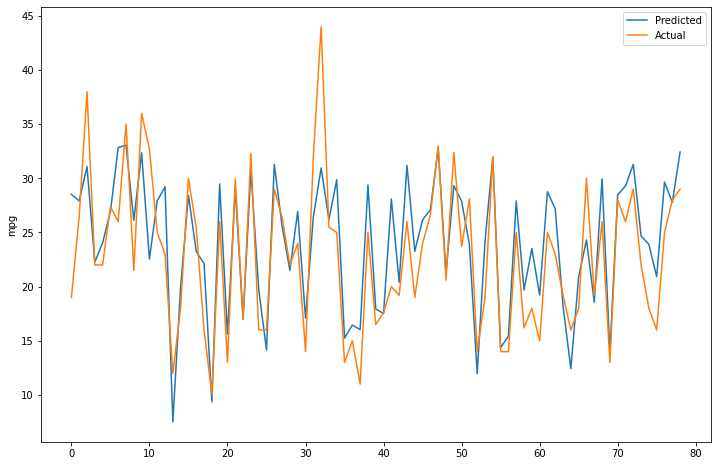

Wall time: 208 ms


In [189]:
%%time
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg, 'mpg', 
                                                       ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
                                                       automobile_df, show_plot_Y=True)

## Polynomial regression (no demo)
* what if the data is not linear -> f(x) = Vx<sup>2</sup> + Wx + b or some higher order polynomial
* linear model performs poorly
* quadratic fit
* generate all of the polynomials for each X and fit a simpler model on the larger polynomial

[link](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2)




In [190]:
from sklearn.preprocessing import PolynomialFeatures
# create all the polynomial features and then run linear regression

# Hyperparameter tuning
* gridsearch - computationally intensive
    * does not differentiate important from trivial paramters
* random search

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [194]:
X = automobile_df.drop(['mpg', 'age'], axis=1)
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [195]:
%%time
parameters = {'alpha':[.2, .4, .6, .7, .8, .9, 1.]}
#CV = cross-validation: 3 = 2 parts to train and 1 to test
grid_search = GridSearchCV(Lasso(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

Wall time: 131 ms


{'alpha': 1.0}

In [197]:
for i in range(len(parameters['alpha'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'alpha': 0.2}
mean test score:  0.7204252990431698
rank:  7
Parameters:  {'alpha': 0.4}
mean test score:  0.7208655194699417
rank:  6
Parameters:  {'alpha': 0.6}
mean test score:  0.7209407668629795
rank:  5
Parameters:  {'alpha': 0.7}
mean test score:  0.7209695802502525
rank:  4
Parameters:  {'alpha': 0.8}
mean test score:  0.7209969980107163
rank:  3
Parameters:  {'alpha': 0.9}
mean test score:  0.7210233559802367
rank:  2
Parameters:  {'alpha': 1.0}
mean test score:  0.7210484338933866
rank:  1


In [198]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha']).fit(x_train, y_train)

In [199]:
y_pred = lasso_model.predict(x_test)

print('Training score: ', lasso_model.score(x_train, y_train))
print('test score: ', r2_score(y_test, y_pred))

Training score:  0.7257451687043475
test score:  0.6374432459773283


In [202]:
%%time
parameters = {'n_neighbors':[10,12,14,18,20,25,30,35,50]}
grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

Wall time: 218 ms


{'n_neighbors': 25}

In [203]:
for i in range(len(parameters['n_neighbors'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_neighbors': 10}
mean test score:  0.7290938857679409
rank:  7
Parameters:  {'n_neighbors': 12}
mean test score:  0.7299994192490619
rank:  6
Parameters:  {'n_neighbors': 14}
mean test score:  0.7285514866279406
rank:  8
Parameters:  {'n_neighbors': 18}
mean test score:  0.7320771108624234
rank:  5
Parameters:  {'n_neighbors': 20}
mean test score:  0.7345832359846448
rank:  2
Parameters:  {'n_neighbors': 25}
mean test score:  0.7349778079832304
rank:  1
Parameters:  {'n_neighbors': 30}
mean test score:  0.7339512367385194
rank:  3
Parameters:  {'n_neighbors': 35}
mean test score:  0.7337162777846858
rank:  4
Parameters:  {'n_neighbors': 50}
mean test score:  0.7199762641612274
rank:  9


In [204]:
kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

In [206]:
y_pred = kneighbors_model.predict(x_test)
print('Training score: ', kneighbors_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))
#scores may be higher b/c using more data than was used for corss-validation of grid search

Training score:  0.7479422952297794
Testing score:  0.6286802612186073


In [207]:
parameters = {'max_depth': [1,2,3,4,5,7,8]}
grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 3}

In [210]:
for i in range(len(parameters['max_depth'])):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'max_depth': 1}
mean test score:  0.5581992203044693
rank:  7
Parameters:  {'max_depth': 2}
mean test score:  0.6922708947309483
rank:  2
Parameters:  {'max_depth': 3}
mean test score:  0.7168765670392455
rank:  1
Parameters:  {'max_depth': 4}
mean test score:  0.6554770694099216
rank:  3
Parameters:  {'max_depth': 5}
mean test score:  0.6442496380280093
rank:  5
Parameters:  {'max_depth': 7}
mean test score:  0.6093202154122085
rank:  6
Parameters:  {'max_depth': 8}
mean test score:  0.6462191371938487
rank:  4


In [208]:
dtree_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth']).fit(x_train, y_train)

In [209]:
y_pred = dtree_model.predict(x_test)
print('Training score: ', dtree_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))
#scores may be higher b/c using more data than was used for corss-validation of grid search

Training score:  0.7890662228890972
Testing score:  0.6500140996340117


In [212]:
%%time
parameters = {'epsilon':[.05, .1, .2, .3], 'C':[.2,.3]}

grid_search = GridSearchCV(SVR(kernel='linear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

Wall time: 1min 15s


{'C': 0.3, 'epsilon': 0.05}

In [213]:
svr_model = SVR(kernel='linear', epsilon=grid_search.best_params_['epsilon'], C=grid_search.best_params_['C']).fit(x_train, y_train)


In [214]:
y_pred = svr_model.predict(x_test)

print('Training score: ', svr_model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.7140688300014524
Testing score:  0.6299288031136361


# never used random search???

In [215]:
from sklearn.model_selection import RandomizedSearchCV